# Keras Hello world
参考: https://www.bilibili.com/video/av40787141

In [187]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam

## 线性回归

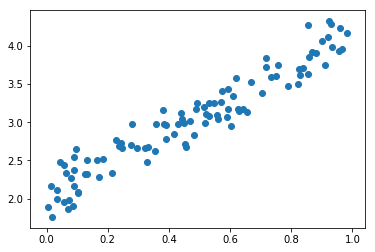

In [38]:
# 构造线性数据 y = 2*x + 2
x_data = np.random.random(100)
# 添加噪音，数据总量100，平均值0.1，标准差0.2
noise = np.random.normal(0.1, 0.2, size=(100))
y_data = 2 * x_data + 2 + noise

# 散点图显示x,y之间的关系
plt.scatter(x_data, y_data)

In [43]:
# 构造序列网络模型
model = Sequential()
# 增加全连接网络层，配置输出神经元units数量，输入的维度input_dim
# 因为预测的是一个标量，所以配置一个神经元即可，输入的数据只有一个特征，所以输入的维度是1
# 配置输入的数据有两种方式input_dim, input_shape
# model.add(Dense(units=1, input_dim=1))
model.add(Dense(units=1, input_shape=(1,)))
# 编译模型，优化器选择SGD，损失函数选择MSE，均方差
model.compile(optimizer="SGD", loss="MSE")


# 由于只有一个全连接层及单元，所以只有一个 (W, b)连接权重，即y = W*x + b

# 训练模型有多重方式，
# 1. fit: 传入特征及目标值，以及训练的轮数，所有数据都训练了一次叫做一轮，1 epochs，
# 还可以传入批次的数量batch_size
model.fit(x=x_data, y=y_data, epochs=20)

Epoch 1/20
100/100 [==============================] - 0s 2ms/step - loss: 8.4477
Epoch 2/20
100/100 [==============================] - 0s 169us/step - loss: 5.1702
Epoch 3/20
100/100 [==============================] - 0s 153us/step - loss: 3.1813
Epoch 4/20
100/100 [==============================] - 0s 203us/step - loss: 1.9773
Epoch 5/20
100/100 [==============================] - 0s 183us/step - loss: 1.2455
Epoch 6/20
100/100 [==============================] - 0s 164us/step - loss: 0.8012
Epoch 7/20
100/100 [==============================] - 0s 179us/step - loss: 0.5293
Epoch 8/20
100/100 [==============================] - 0s 169us/step - loss: 0.3639
Epoch 9/20
100/100 [==============================] - 0s 119us/step - loss: 0.2628
Epoch 10/20
100/100 [==============================] - 0s 208us/step - loss: 0.2010
Epoch 11/20
100/100 [==============================] - 0s 193us/step - loss: 0.1631
Epoch 12/20
100/100 [==============================] - 0s 243us/step - loss: 0.1388
Epo

In [44]:
# 2. train_on_bacth
for i in range(3000):
#     这是训练了3000 轮？
    error = model.train_on_batch(x_data, y_data)
    if i % 300 == 0:
        print(error)

0.090878
0.058578752
0.044805985
0.038834304
0.036245
0.0351223
0.0346355
0.034424435
0.034332916
0.034293234


[[1.4714545]] [0.98754466]


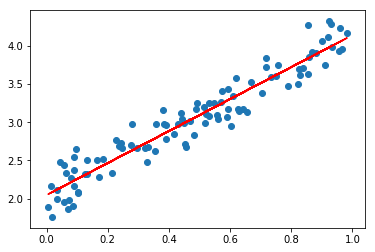

In [41]:
# print W, b
w, b = model.layers[0].get_weights()
print(w, b)

y_predict = model.predict(x_data)
plt.scatter(x_data, y_data)
plt.plot(x_data, y_predict, c="red")

## 非线性回归

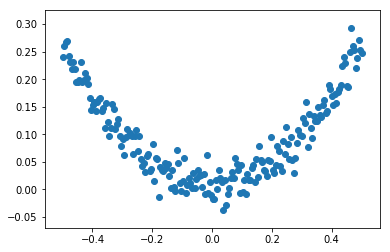

In [37]:
# 构造非线性模型数据
# 生成范围-0.5 到 0.5的等距离的200个点， 步长 (0.5 + 0.5) / 200
x1_data = np.linspace(-0.5, 0.5, 200)
# 添加噪音
noise1 = np.random.normal(0.01, 0.02, size=(200))
# y = x * x
y1_data = np.square(x1_data) + noise1

plt.scatter(x1_data, y1_data)

In [114]:
# 构造模型
model1 = Sequential()
# 增加第一个全连接层，输出单元为2
# 好像当前模型其他条件不变的情况下，sigmoid的效果比起tanh要差很多，几乎难以弯曲，或者说拟合
# 可以通过在Dense里面添加activation关键字的方式或者使用Activation对象
# model1.add(Dense(units=10, input_dim=1, activation="sigmoid"))
# 而神经元的数量可以使得弯曲程度加快
model1.add(Dense(units=10, input_dim=1, activation="tanh"))
# model1.add(Activation("tanh"))
# 增加第二个全连接层，输出单元为1，即最终结果，除了模型的第一层需要配置输入数据的维度，后面面的网络层只需要配置输出单元
model1.add(Dense(units=1, activation="tanh"))
# model1.add(Activation("tanh"))


# 默认SGD优化器学习率比较低
sgd1 = SGD(lr=0.5)
model1.compile(sgd1, loss="mse")

# 而最终的模型收敛速度由很多方面决定，比如优化器的学习效率，activation的选择，神经元的数量

In [112]:
for i in range(3000):
    loss = model1.train_on_batch(x1_data, y1_data)
    if i % 200 == 0:
        print(loss)

# model1.fit(x1_data, y1_data, epochs=10)

0.029192843
0.0058782045
0.0051946603
0.010781704
0.0042360215
0.0046211095
0.0027226591
0.0014999661
0.00088559656
0.00065313274
0.0005625876
0.00053148484
0.0005234676
0.00052778504
0.0005398084


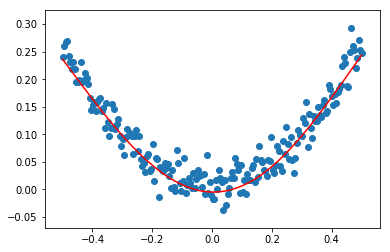

In [113]:
y1_predict = model1.predict(x1_data)
plt.scatter(x1_data, y1_data)
plt.plot(x1_data, y1_predict, c="red")

## MNIST 数据集分类

In [132]:
from keras.datasets import mnist
from keras.utils import np_utils

(60000, 28, 28)
(60000,)
5


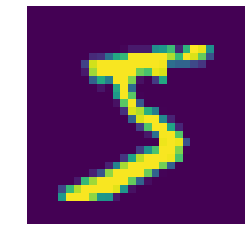

In [142]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 查看数据shape
print(x_train.shape)
print(y_train.shape)

# 查看数据内容
plt.imshow(x_train[0,:,:])
# 不显示数据轴
plt.axis("off")
print(y_train[0])

In [192]:
# 数据预处理，原始数据是28x28的二维数据，需要转换成1维数据给全连接层
# 一定要数据归一化,不然训练时间大大加长, 且准确率一直上不去
# 如果用增加学习效率的方式提升收敛速度(数据没归一化的话),很有可能会准确率不增反降！！！
x_train_  = x_train.reshape((x_train.shape[0], -1)) / 255.0
x_test_  = x_test.reshape((x_test.shape[0], -1)) / 255.0

# 构建网络模型
model2 = Sequential()
# softmax将数值转为概率
model2.add(Dense(units=10, activation="softmax", input_shape=(x_train_.shape[1], ), bias_initializer="one"))

# 不同的优化器对不同的问题有不同的效率，需要按需选择
sgd = SGD(lr=0.2)
# adm = Adam(lr=0.01)
model2.compile(sgd, loss="mse", metrics=["accuracy"])

In [151]:
# 因为输出的shape是(10, ), 而原始数据的shape是(1)， 所以需要将数据做一定的变形
y_train_ = np_utils.to_categorical(y_train, num_classes=10)
y_test_ = np_utils.to_categorical(y_test, num_classes=10)

# 再次查看目标值数据结构
print(y_train_.shape)
print(y_train[0])
print(y_train_[0,:])

(60000, 10)
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [193]:
# 训练模型
model2.fit(x_train_, y_train_, epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0367 - acc: 0.7883
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0203 - acc: 0.8807
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0178 - acc: 0.8928
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0165 - acc: 0.8986
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0157 - acc: 0.9031
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0151 - acc: 0.9061
Epoch 7/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0147 - acc: 0.9090
Epoch 8/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0143 - acc: 0.9109
Epoch 9/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0140 - acc: 0.9122
Epoch 10/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0138 - acc: 0.9135

In [191]:
# 评估模型
model2.evaluate(x_test_, y_test_)

10000/10000 [==============================] - 1s 59us/step


[0.013855882668856997, 0.9212]

### 使用交叉熵提高准确率

In [195]:
# 数据预处理
x_train_  = x_train.reshape((x_train.shape[0], -1)) / 255.0
x_test_  = x_test.reshape((x_test.shape[0], -1)) / 255.0

y_train_ = np_utils.to_categorical(y_train, num_classes=10)
y_test_ = np_utils.to_categorical(y_test, num_classes=10)

# 构建网络模型
model2 = Sequential()
model2.add(Dense(units=10, activation="softmax", input_shape=(x_train_.shape[1], ), bias_initializer="one"))


sgd = SGD(lr=0.2)
# 只需改变损失函数为categorical_crossentropy
model2.compile(sgd, loss="categorical_crossentropy", metrics=["accuracy"])
# 训练模型
model2.fit(x_train_, y_train_, epochs=4, batch_size=32)

# 评估模型
model2.evaluate(x_test_, y_test_)

# 就输出信息而言，准确率第一轮就上升到了0.89，比之前的mse的第一轮数据0.78要很多呀！
# 说明可以通过交叉熵的方式减少训练时间，同样的数据，mse需要训练十轮才达到饱和，交叉熵4轮差不多就可以了
# 但是最终的结果相差无几

Epoch 1/4
60000/60000 [==============================] - 4s 62us/step - loss: 0.3758 - acc: 0.8941
Epoch 2/4
60000/60000 [==============================] - 3s 47us/step - loss: 0.3031 - acc: 0.9152
Epoch 3/4
60000/60000 [==============================] - 3s 48us/step - loss: 0.2904 - acc: 0.9180
Epoch 4/4
10000/10000 [==============================] - 1s 82us/step


[0.27471519321799276, 0.9244]

### 通过Dropout放置过拟合